# Predict whether income exceeds $50K/yr based on census data.


Attribute Information:

1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
4. education-num: continuous.
5. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
6. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-    op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
7. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
8. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
9. sex: Female, Male.
10. capital-gain: continuous.
11. capital-loss: continuous.
12. hours-per-week: continuous.
13. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
14. fnlwgt: continuous. 
       

# Load Basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
data=pd.read_csv(r"C:\Users\Manju Prasad N\Desktop\Adult-Census-Income-master\adult.csv")

In [3]:
#displaying first 10 rows of the dataset
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
##checking the info of variable datatype[object,int] i.e catagorical and continuous
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are about 6 continuous variable  and 9 are categorical variable among which income is dependent i.e which has to be predicted  rest all are independent feature

In [5]:
##getting the attribute feature name and shape i.e number of rows and columns of dataset
print(data.columns)
print(data.shape)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
(32561, 15)


In [6]:
##checking for misssing value or null value
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


There are no missing value or null value but observing the data there are "?" marks in the data checking for ? .

In [7]:
#determining no of unique  value of all the features
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Describe function is to determine the continuous variable vaule of count,mean,std,min,25%,50%,75%,max of the data

# Data Exploration and Visualization

In [9]:
#Separate categorical and numberical columns
cat_col = data.dtypes[data.dtypes == 'object']
num_col = data.dtypes[data.dtypes != 'object']

In [10]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= data[col].value_counts()
    percent = data[col].value_counts() / data.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  total   percent
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              total   percent
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Preschool        51  0.001566


--------------------Marital.Status--

• The above cell describes the unique value of catogorical variable and the total and percentage of data present

• Native.Country, Occupation, Workclass

has unknown values represented by ?

• Native.Country has United states which has 90% of data

• The countries such as Cuba,England,Jamaica,South,China,Italy,Dominican-Republic,Vietnam,Guatemala,Japan,Poland,Columbia,
Taiwan,Haiti,Iran,Portugal,Nicaragua,Peru,France,Greece,Ecuador,Ireland,Hong,Trinadad&Tobago,Cambodia,Laos,Thailand,Yugoslavia
Outlying-US(Guam-USVI-etc),Hungary,Honduras,Scotland,Holand-Netherlands had very small value in dataset.These can grouped to an other country category

• Education

HS-grad,9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately

Preschool,1st-4th, 5th-6th, 7th-8th comes under preschool Grad it has mentioned separately

Assoc-voc,Assoc-acdm,Some-college,Prof-school comes under college 

• Marital Status

Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married

Divorced, separated again comes under category separated.

•Workclass

Self-emp-not-inc, Self-emp-inc comes under category self employed

Local-gov,State-gov,Federal-gov comes under category goverment emloyees

# Filling ? Value 

In [11]:
#replacing the ? value with mode value
data['native.country'].replace("?","United-States",inplace=True)
data['occupation'].replace("?","Prof-specialty",inplace=True)
data['workclass'].replace("?","Private",inplace=True)

# Feature Engineering

In [12]:
#education category
data['education'].replace(['HS-grad','9th','10th','11th','12th'],'High school',inplace=True)
data['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th'],'Preschool',inplace=True)
data['education'].replace(['Assoc-voc','Assoc-acdm','Some-college','Prof-school'],'College',inplace=True)
data['education'].value_counts()

High school    13556
College        10316
Bachelors       5355
Masters         1723
Preschool       1198
Doctorate        413
Name: education, dtype: int64

In [13]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [14]:
#Marital Status Divorced,Separated
data['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married',inplace=True)
data['marital.status'].replace(['Divorced','Separated'],'Separated',inplace=True)
data['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

In [15]:
#Workclass category
data['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'Employed',inplace=True)
data['workclass'].replace(['Local-gov','State-gov','Federal-gov'],'Govt Employees',inplace=True)
data['workclass'].value_counts()

Private           24532
Govt Employees     4351
Employed           3657
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

In [16]:
data['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [17]:
#Native.Country category 
data['native.country'].replace([['Cuba', 'Ireland','Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti','El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 
    'Jamaica','South','China','Italy','Vietnam','Japan','Poland','Taiwan','Iran','Greece','Hong','Trinadad&Tobago','Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal',
    'Laos',"England",'Thailand', 'Outlying-US(Guam-USVI-etc)','Hungary','Honduras','Scotland','Holand-Netherlands']],'Other Country',inplace=True)


In [18]:
data['native.country'].value_counts()

United-States    29753
Other Country     1495
Mexico             643
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
India              100
Name: native.country, dtype: int64

# Exploratory Data Analysis

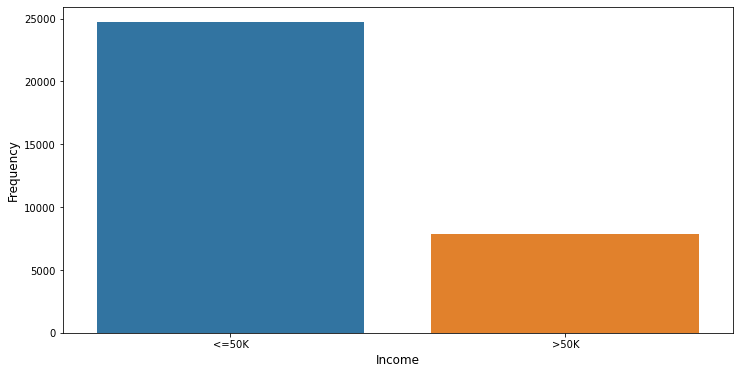

In [19]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = data);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);


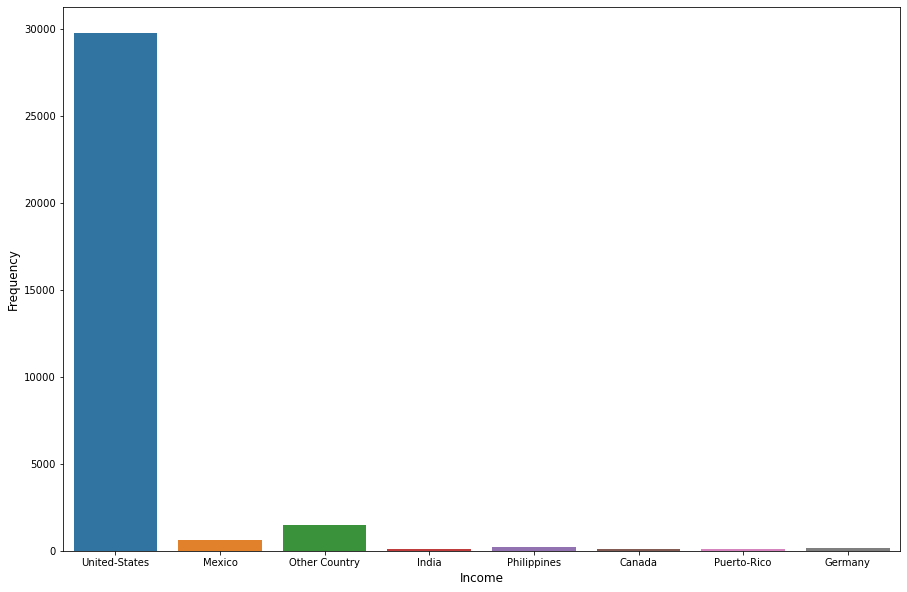

In [20]:
plt.figure(figsize =(15,10));
sns.countplot(x= 'native.country', data = data);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);


• Our dataset has 25000 people earning <=50K i.e. 75% and remainng 25% earns more than 50K.

• Our dataset has 90% of data related to United States

• Let's explore distribution of numerical features.

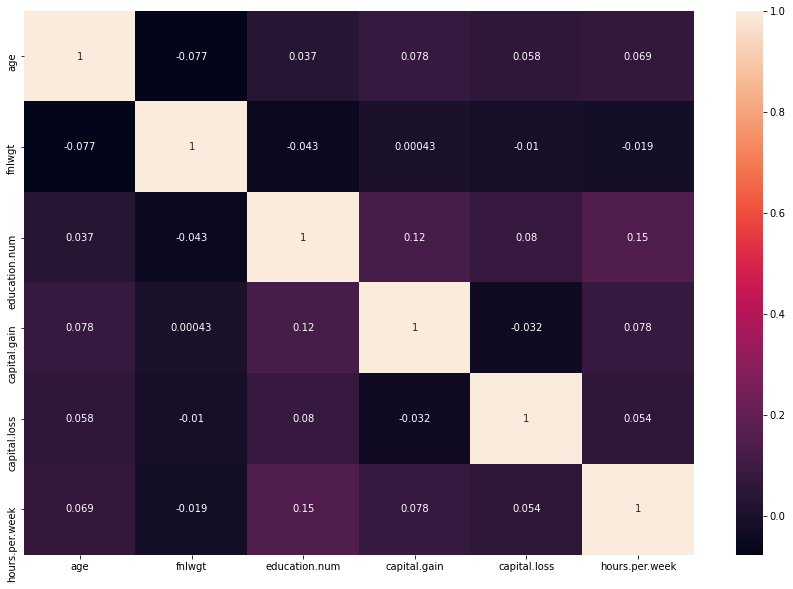

In [21]:
result=data.corr()
plt.figure(figsize =(15,10));
sns.heatmap(result,annot=True)
plt.show()

strong correlation.

• Age and Hours per week.

• Age and capital gain.

• capital gain and hours per week.

Moderate Correlation

• capital loss and age

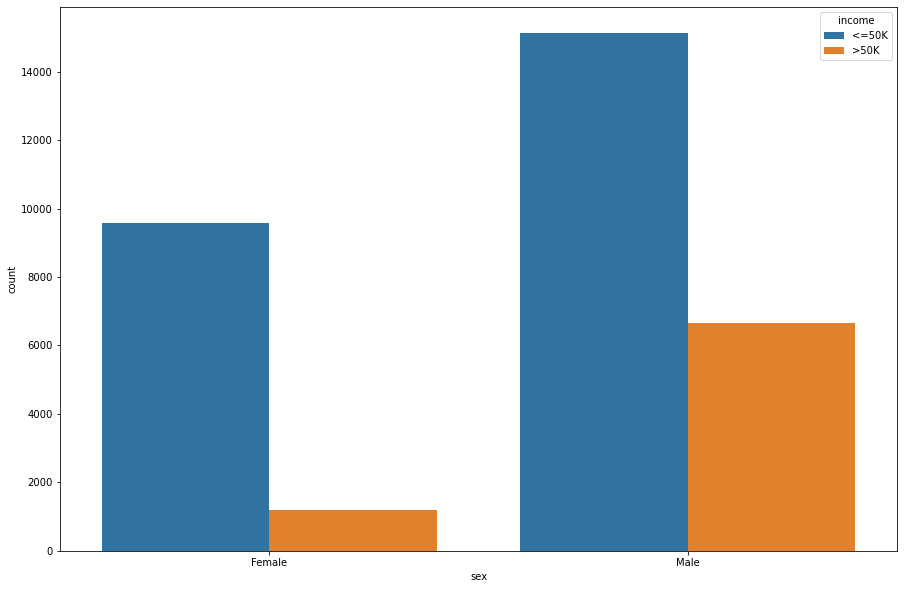

In [22]:
plt.figure(figsize =(15,10));
sns.countplot(x='sex',hue='income',data=data)
plt.show()

• income <=50k is more in male around 20k

• income >50k is more in male around 7k

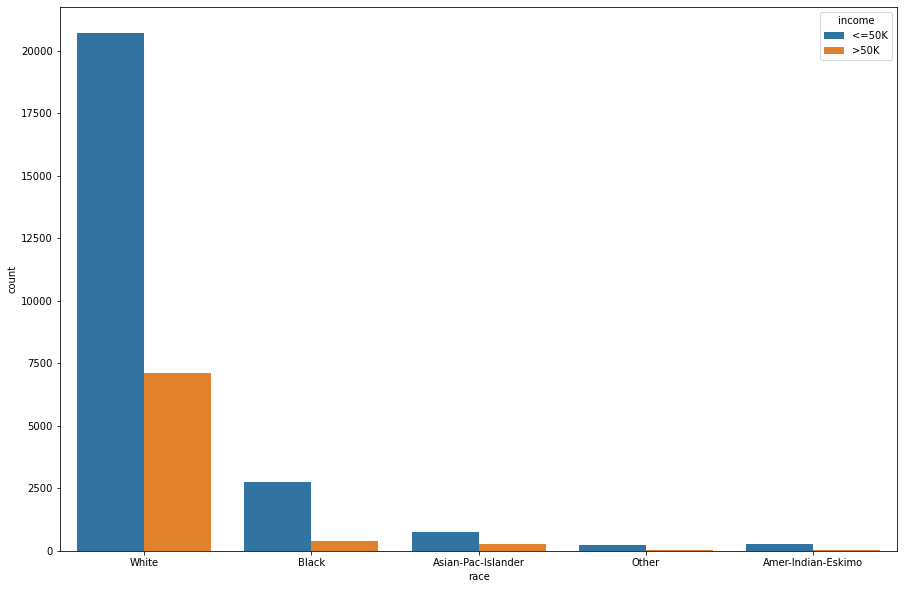

In [23]:
plt.figure(figsize =(15,10));
sns.countplot(x='race',hue='income',data=data)
plt.show()

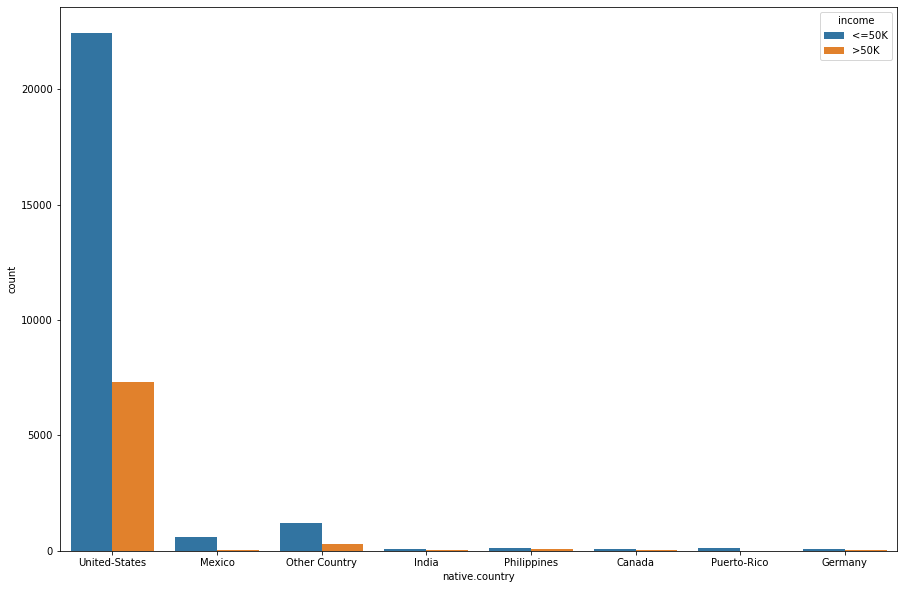

In [24]:
plt.figure(figsize =(15,10));
sns.countplot(x='native.country',hue='income',data=data)
plt.show()

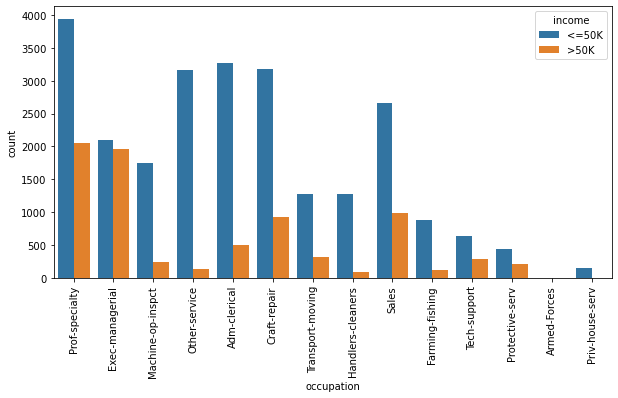

In [25]:
plt.figure(figsize =(10,5));
occ=sns.countplot(x='occupation',hue='income',data=data)
occ.set_xticklabels(occ.get_xticklabels(),rotation=90);
plt.show()

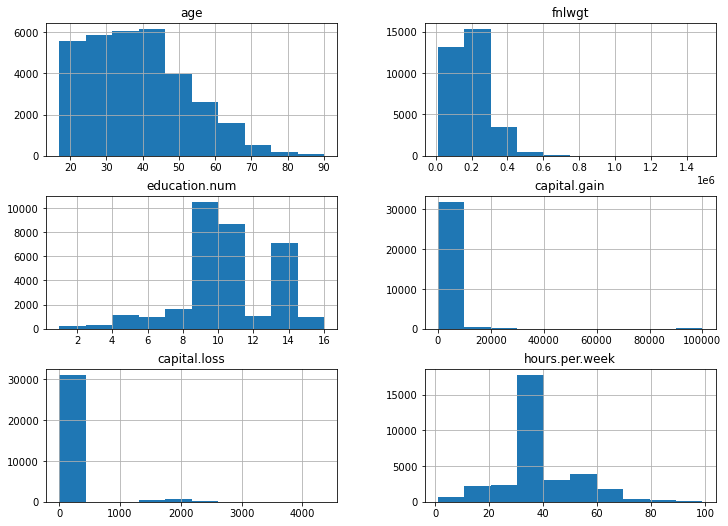

In [26]:
data.hist(figsize=(12,12), layout=(4,2), sharex=False);

• age: In our dataset People from age group of 18 to 50 can be observed minimum age is 17 and maximum age is 90 yrs.

• capital.gain is over 15000 with an 32000 capital gain and there are some outliers in the data.

• capital.loss is over 5000 with an 30000 capital loss and there are some outliers in the data.

• hours per week: Generally people can be seen working for 30 hours to 40 hours per week and few are working 80 to 90 hrs per     week hard worker and even there are people working for 1 hr a week luxuary .

• education.num: people above 8th grade are more in our dataset.

• Our dataset is highly skewed and we should consider scaling it for better performance of our models.

• We need to analyse Education Number further as it might align with Education information.

• Final Weight is also left skewed.

• For Capital Gain and Capital Loss, the data is highly left skewed which needs to be tackled.


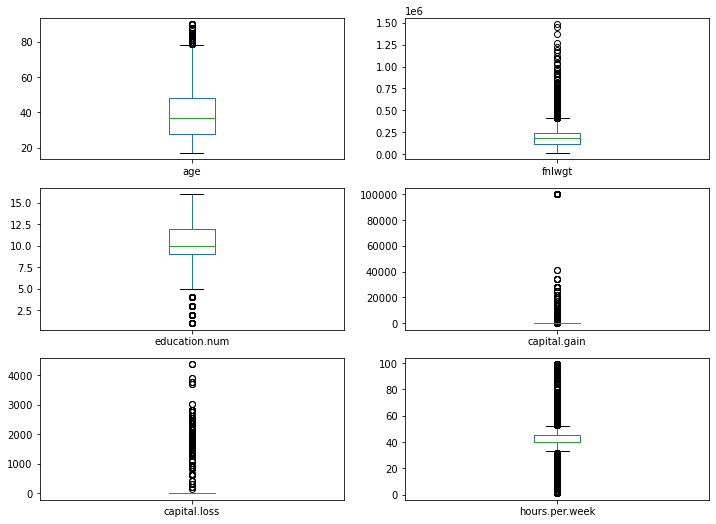

In [27]:
data.plot(kind="box",figsize=(12,12),layout=(4,2), subplots=True);

• Outliers observed in almost all the numeric features,these are the extreme value that are present in the data

• most of the age group is 18-50 in histogram, but there are people who are age group of 80-90yrs

• most of the pepole who work on an average 40 hrs a week there are people who work hard for 80-90hrs a
  week and who work for an 1hr in week (luxuary people)i.e is not working at all

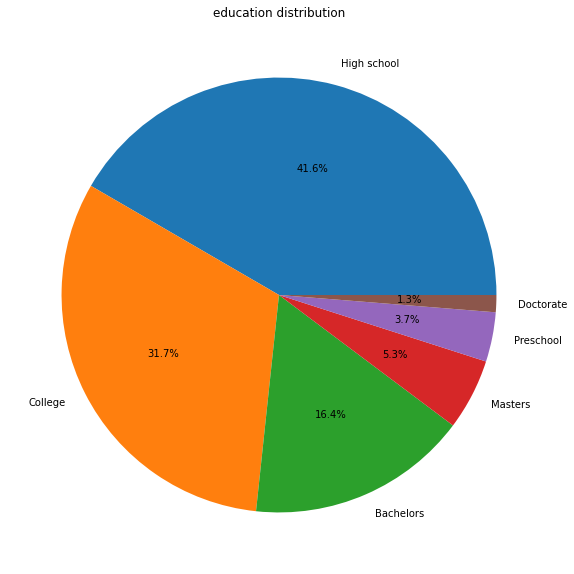

In [28]:
plt.figure(figsize=(30,10));
glab=data['education'].value_counts().index;
gval=data['education'].value_counts().values;
plt.pie(gval,labels=glab,autopct='%1.1f%%');
plt.title("education distribution");

• high school has the highest education distribution with 41.6%,followed by college 31.7%

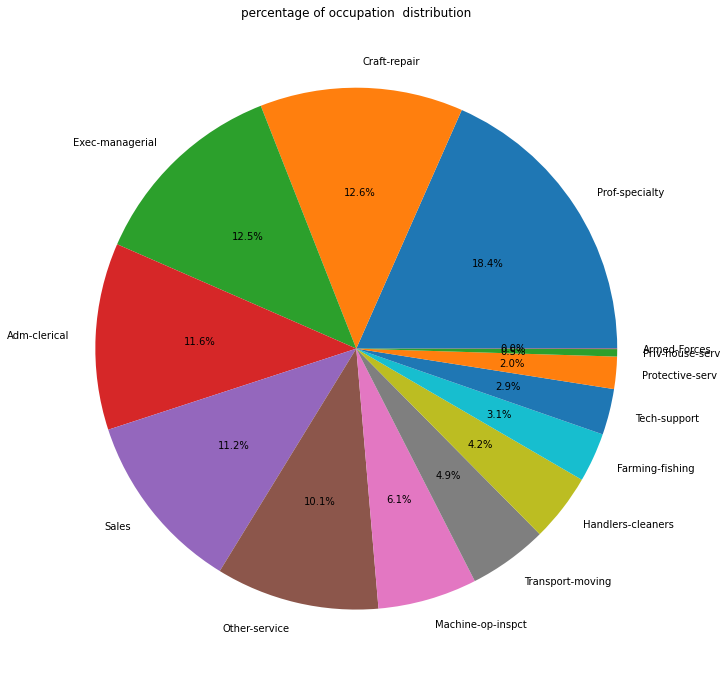

In [29]:
plt.figure(figsize=(30,12));
glab=data['occupation'].value_counts().index;
gval=data['occupation'].value_counts().values;
plt.pie(gval,labels=glab,autopct='%1.1f%%');
plt.title("percentage of occupation  distribution");

          • Prof-specialty has the highest percentage of occupation  distribution with 18.4 %,followed by craft-repair 12.6%

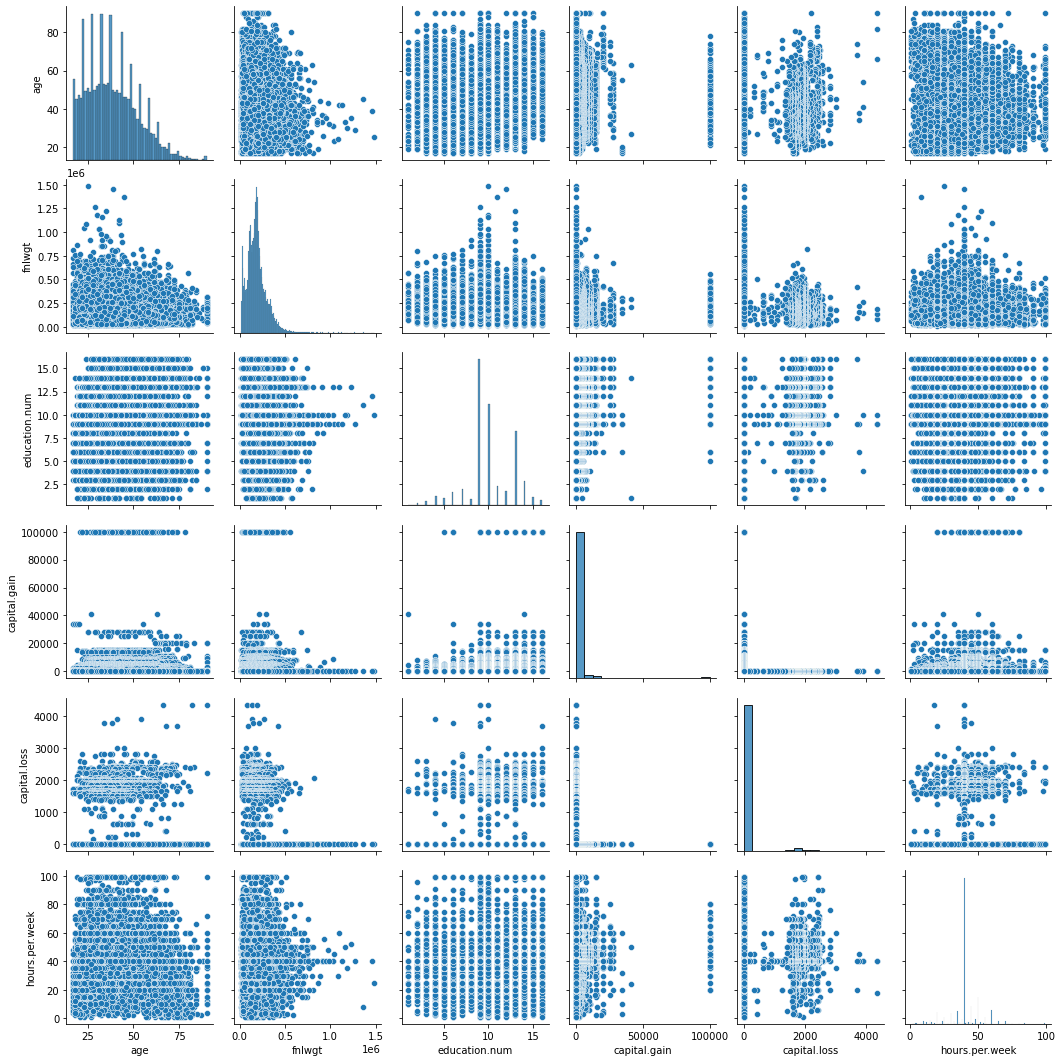

In [30]:
sns.pairplot(data);

# 
• Let's explore more for people having capital loss and capital gain greater than zero.

In [31]:
capital_loss_data =data[data['capital.loss']>0]
capital_gain_data = data[data['capital.gain']>0]


In [32]:
print("Number of observations having capital loss above median value:",capital_loss_data.shape[0])
print("Number of observations having capital gain above median value:",capital_gain_data.shape[0])
print(f"Percentage of people having capital gain greater than median value: {(capital_gain_data.shape[0]/data.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(capital_loss_data.shape[0]/data.shape[0])*100:4f}%")

Number of observations having capital loss above median value: 1519
Number of observations having capital gain above median value: 2712
Percentage of people having capital gain greater than median value: 8.3290%
Percentage of people having capital loss greater than median value: 4.665090%


In [33]:
capital_gain_0=capital_loss_data.loc[:,['capital.loss','capital.gain']].sample(10)

capital_loss_0 = capital_gain_data.loc[:,['capital.loss','capital.gain']].sample(5)
print(capital_gain_0.head())
print(capital_loss_0.head())

      capital.loss  capital.gain
1413          1485             0
993           1762             0
1348          1564             0
848           1887             0
108           2415             0
      capital.loss  capital.gain
3739             0          3103
4118             0          1471
4226             0           114
1904             0         15024
3201             0          4787


• That means 92% of people are having capital gain equal to zero.

Possibilities for capital gain and capital loss

•Both capital gain and capital loss can be zero

• If capital.gain is zero there is possibility of capital loss being high or above zero.

• If capital loss is zero there is possibility of capital.gain being high or above zero.

In [34]:
# Exploring Case when capital.gain and capital loss both are zero. As this category of people are more in our dataset.
print(f"Number of observations having capital gain and capital loss zero: {data[(data['capital.loss'] == 0) & (data['capital.gain'] == 0)].shape}")
for col in cat_col.index:
    print(f"================================{col}=================================")
    print(data[(data['capital.loss'] == 0) & (data['capital.gain'] == 0)][col].value_counts())


Number of observations having capital gain and capital loss zero: (28330, 15)
================================workclass=================================
Private           21637
Govt Employees     3714
Employed           2960
Without-pay          12
Never-worked          7
Name: workclass, dtype: int64
================================education=================================
High school    12246
College         9020
Bachelors       4384
Masters         1300
Preschool       1096
Doctorate        284
Name: education, dtype: int64
================================marital.status=================================
Married          12603
Never-married     9914
Separated         4934
Widowed            879
Name: marital.status, dtype: int64
================================occupation=================================
Prof-specialty       4952
Craft-repair         3593
Adm-clerical         3408
Exec-managerial      3219
Sales                3138
Other-service        3122
Machine-op-inspct    1806
T

• So 87% of people in our dataset has capital gain and loss = 0

• This concludes capital gain and capital loss are highly skewed features and even have outliers which need to be taken care of.


In [35]:
data.loc[data['capital.gain'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2712.000000,2.712000e+03,2712.000000,2712.000000,2712.0,2712.000000
mean,44.016224,1.880805e+05,11.066003,12938.541298,0.0,43.510324
std,13.268269,1.033775e+05,2.663273,22395.413530,0.0,12.207654
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.180670e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.759390e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.364735e+05,13.000000,14084.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


• Maximum value of capital gain is 99999 which is far above 75% quartile range.This is definitely an outlier. Lets try and understand more about this maximum value of 99999

In [36]:
print("Number of observations having capital gain of 99999:",data.loc[data['capital.gain'] == 99999,:].shape)
print("Income counts: ",data.loc[data['capital.gain'] == 99999,:]['income'].value_counts())


Number of observations having capital gain of 99999: (159, 15)
Income counts:  >50K    159
Name: income, dtype: int64


• So 159 people their income is greater than 50K .

In [37]:

data.loc[data['capital.loss'] > 0,:].describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,185492.941409,10.969059,0.0,1871.428571,43.252798
std,12.625609,97621.521906,2.688426,0.0,376.571535,12.247258
min,17.000000,20953.000000,1.000000,0.0,155.000000,1.000000
25%,32.000000,118854.000000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,175109.000000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,228991.500000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000


• Maximum value of capital loss is 4356

In [38]:
print("Number of observations having capital loss of 4356:",data.loc[data['capital.loss'] == 4356,:].shape[0])
print("Income Distribution among people with capital loss above mean:")
print("Income counts:\n",data.loc[data['capital.loss'] >= 1871,:]['income'].value_counts())



Number of observations having capital loss of 4356: 3
Income Distribution among people with capital loss above mean:
Income counts:
 >50K     658
<=50K    277
Name: income, dtype: int64


• People with Income above 50K are having capital loss above mean value is 658 .

• People with Income <=50K are having capital loss above mean value is 277 .

It shows there are some other parameters affecting their loss irrespective of high salary.

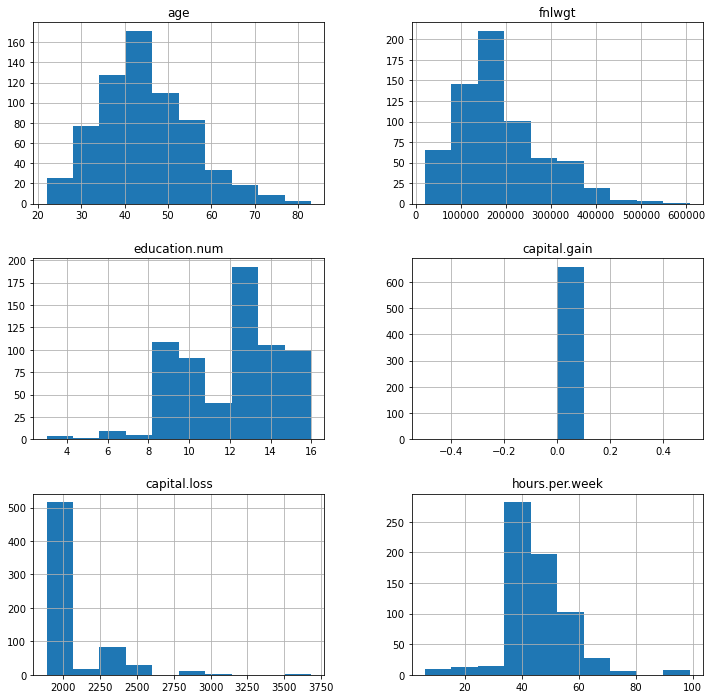

In [39]:
# let's understand characteristics of people having capital loss greater than mean value and having income greater than 50K
data[(data['capital.loss'] >= 1871) & (data['income'] == '>50K')].hist(figsize = (12,12));


• Education and hours per week are significantaly high.

• There are some other factors affecting their loss other than the above


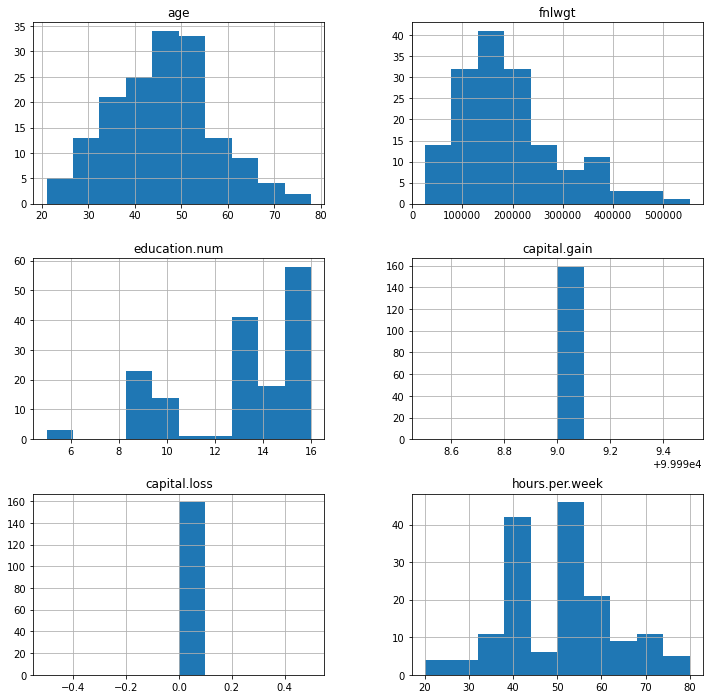

In [40]:
# let's understand characteristics of people having maximum value of the capital gain
data.loc[data['capital.gain'] == 99999,:].hist(figsize = (12,12));

• Age group and hours per week are fairly distributed for capital gain of 99999.


In [41]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

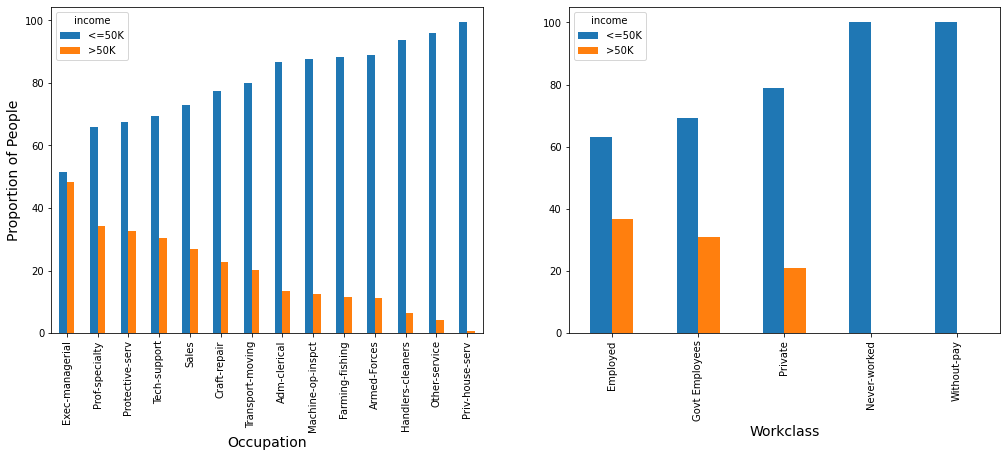

In [42]:
table_occu = pd.crosstab(data['occupation'],data['income'])
table_workclass = pd.crosstab(data['workclass'],data['income'])
table_edu = pd.crosstab(data['education'],data['income'])
table_marital = pd.crosstab(data['marital.status'],data['income'])
table_race = pd.crosstab(data['race'],data['income'])
table_sex = pd.crosstab(data['sex'],data['income'])
table_country = pd.crosstab(data['native.country'],data['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);


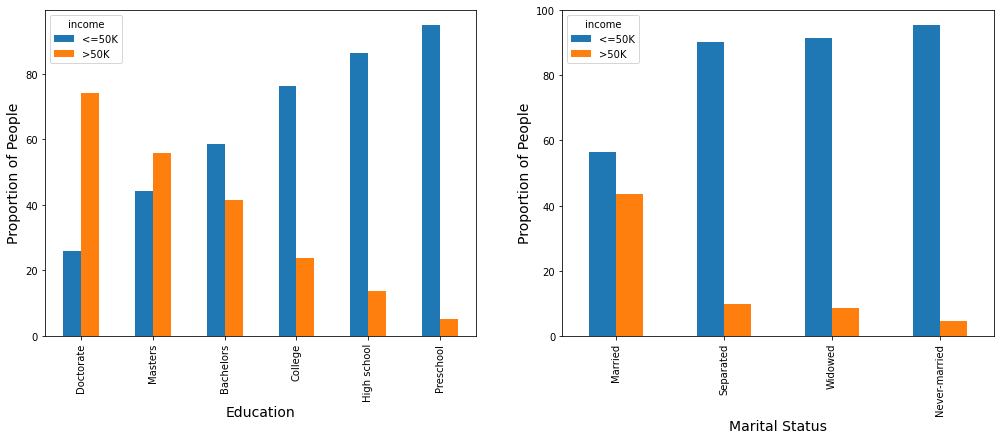

In [43]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

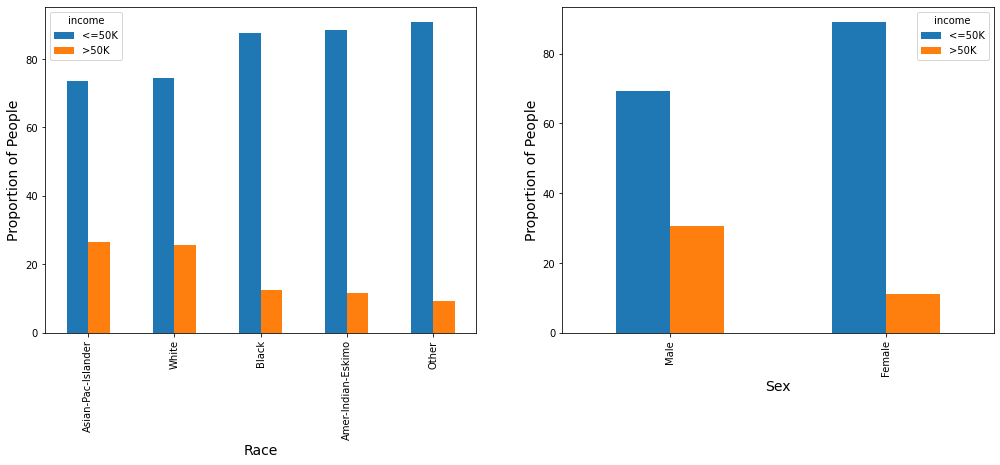

In [44]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

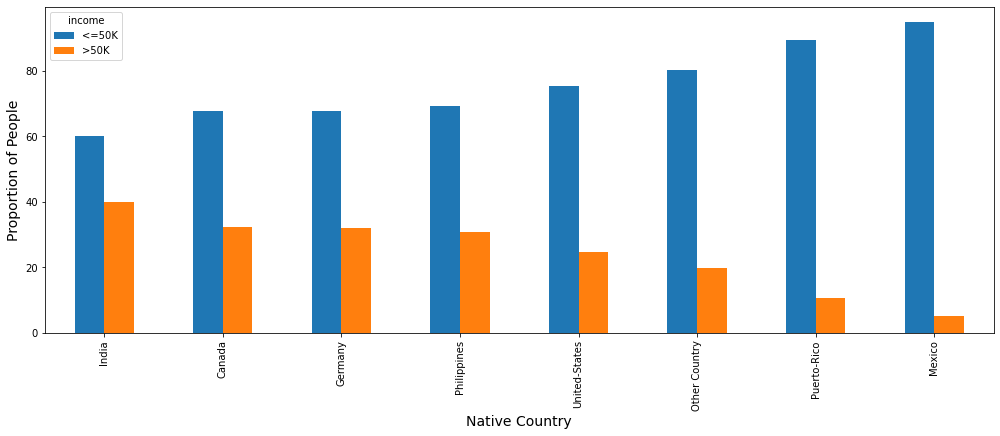

In [45]:
table_country = pd.crosstab(data['native.country'], data['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Summary

1. Sex:- Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% female earn    less than 50K

2. Race:- White and asain-pac-Islander earn salary more than 50K

3. marital_status :- 41% of married people seem to earn salary greater than 50K.

4. People having degree doctorate,Bacholers,masters are making salary more than 50K.

5. Out of all the workclass only 38% self employed people are making salary more than 50K.

6. If I check by occupation, Proportion of people making salary less than 50K is higher.




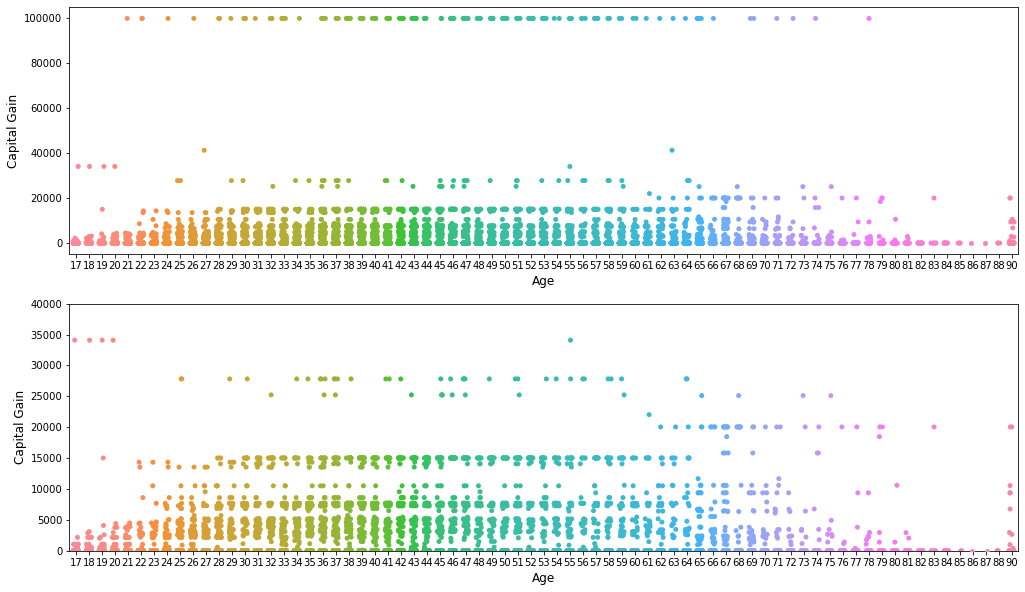

In [46]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital.gain', data = data,jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital.gain', data = data,jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

• Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90

• Age 90 doesn't follow the pattern.

• Capital.gain of 99999 is clearly a outlier let's remove it.

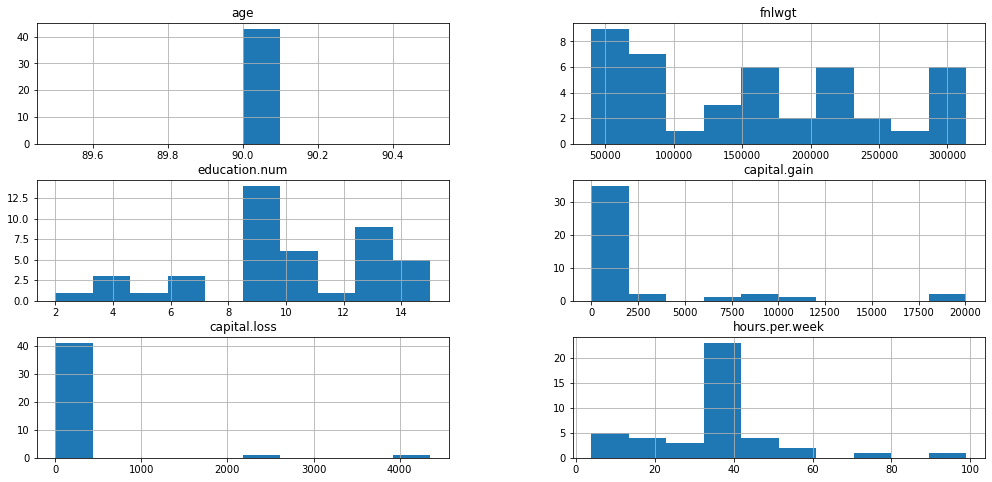

In [47]:
data[data['age'] == 90].hist(figsize = (17,8));

In [48]:
cols = ['workclass','occupation', 'income']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(data[data['age'] == 90][col].value_counts())
    else:
        continue
   

=======================================workclass=========================
Private           35
Govt Employees     5
Employed           3
Name: workclass, dtype: int64
=======================================occupation=========================
Prof-specialty       12
Exec-managerial       8
Other-service         6
Adm-clerical          4
Craft-repair          3
Sales                 3
Machine-op-inspct     3
Handlers-cleaners     1
Farming-fishing       1
Transport-moving      1
Protective-serv       1
Name: occupation, dtype: int64
=======================================income=========================
<=50K    35
>50K      8
Name: income, dtype: int64


• At age 90 people can't work in goverment or private sectors

• Morever it shows the peak working hours as 40.

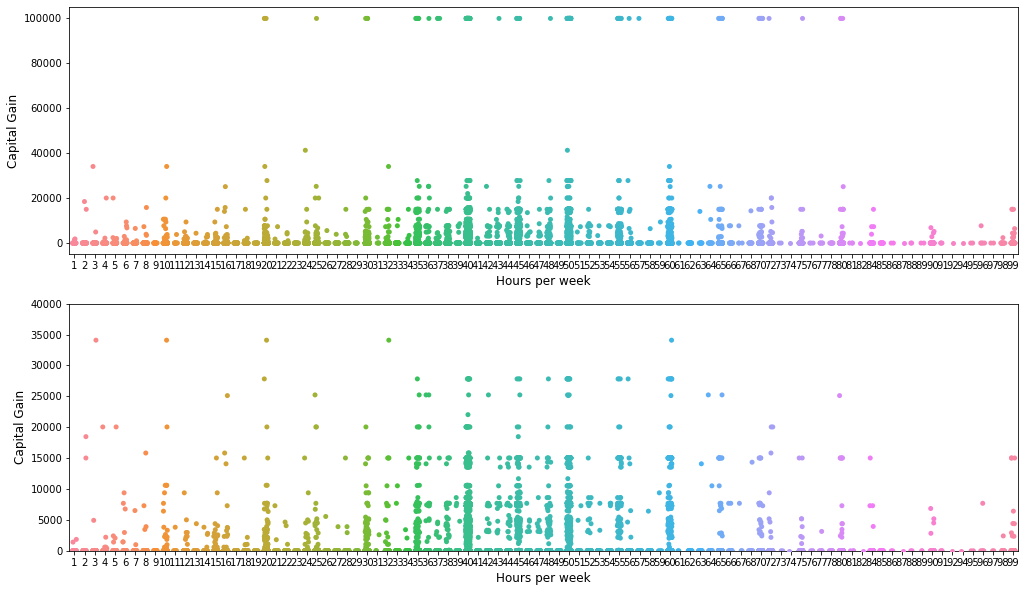

In [49]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours.per.week', 'capital.gain', data = data,jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours.per.week', 'capital.gain', data = data,jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

• Majority of people can be seen working for 40,50 and 60 hours per week and capital gain seems to be increasing.

• There are few people working for 99 hours per week but doesn't seem to make high capital gain. Conversely people working below 40 hours per week are making high capital gains.

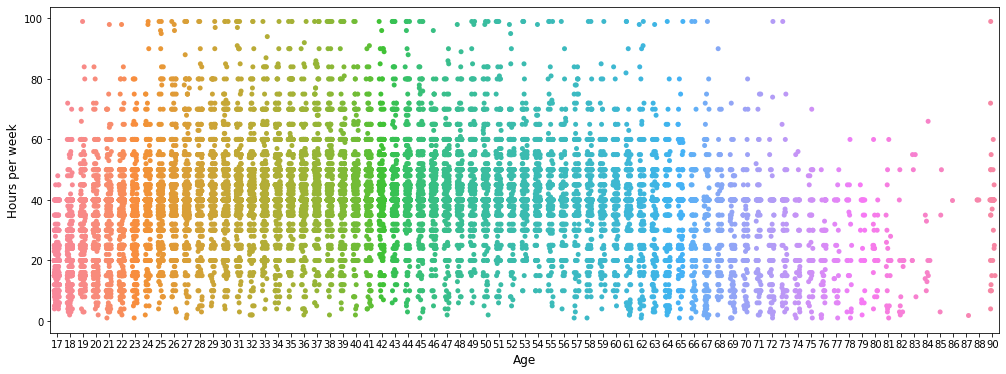

In [50]:
fig = plt.figure(figsize = (17,6))

sns.stripplot('age','hours.per.week', data = data,jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Hours per week',fontsize = 12);

Outliers Summary

• Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.

• Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is again unreasonable.

• Few people working for 99 hours per week.



# Feature Selection

In [51]:
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,High school,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,High school,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,College,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,Preschool,4,Separated,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,College,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [52]:
data['education'].unique()

array(['High school', 'College', 'Preschool', 'Doctorate', 'Bachelors',
       'Masters'], dtype=object)

In [53]:
data['education.num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

In [54]:
data['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [55]:
data['marital.status'].unique()

array(['Widowed', 'Separated', 'Never-married', 'Married'], dtype=object)

Feature Removal

• Education num and education are giving similar information in number specfying there class

• Relationship and marital status imply similar information.Hence keeping only one of the two.

In [56]:
data.drop(['relationship','education.num'],axis=1,inplace=True)

• Outliers

• As we know in govt and private people at the age of 90 are not allowed to so v r droping it

• As we seen before the capital gain with 99999 with working hour per week is less which is an outlers  

• It won't be a good idea to delete all the outliers because if that's the case with test data too we might get false results. So I am keeping people working for 99 hourse per week.

In [57]:
index_gain = data[data['capital.gain'] == 99999].index
index_age = data[data['age'] == 90].index

In [58]:
data.drop(labels =index_gain,axis = 0,inplace =True)
data.drop(labels =index_age,axis = 0,inplace =True)
          

In [59]:
data.head()

,age,workclass,fnlwgt,education,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,High school,Widowed,Exec-managerial,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,College,Widowed,Prof-specialty,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,Preschool,Separated,Machine-op-inspct,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,College,Separated,Prof-specialty,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,High school,Separated,Other-service,White,Female,0,3770,45,United-States,<=50K


In [60]:
from sklearn.preprocessing import LabelEncoder,StandardScaler 
data=data.apply(LabelEncoder().fit_transform)
data.head()

,age,workclass,fnlwgt,education,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,65,3,6484,3,3,3,4,0,0,91,17,7,0
2,49,3,11126,1,3,9,2,0,0,91,39,7,0
3,37,3,6976,5,2,6,4,0,0,90,39,7,0
4,24,3,16775,1,2,9,4,0,0,90,39,7,0
5,17,3,14119,3,2,7,4,0,0,89,44,7,0


In [61]:
ss=StandardScaler().fit(data.drop('income',axis=1))

In [62]:
X=ss.transform(data.drop('income',axis=1))
y=data['income']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

# Naive bayes Algorithm

In [64]:
from sklearn.metrics import f1_score,classification_report,accuracy_score,r2_score,mean_squared_error,confusion_matrix
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [65]:
print('The Score on the train set with a Naive Bayes is:',model1.score(X_train,y_train))
print('The Score on the test set with a  Naive Bayes is:', model1.score(X_test,y_test))
print("Accuracy :",model1.score(X_test,y_test)*100,'%')
print("F1 score: :.2f",f1_score(y_test,y_pred))
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification_report :")
print(classification_report(y_test, y_pred))


The Score on the train set with a Naive Bayes is: 0.7918260130567466
The Score on the test set with a  Naive Bayes is: 0.799752781211372
Accuracy : 79.97527812113721 %
F1 score: :.2f 0.45038167938931295
confusion_matrix:
[[4645  331]
 [ 965  531]]
classification_report :
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4976
           1       0.62      0.35      0.45      1496

    accuracy                           0.80      6472
   macro avg       0.72      0.64      0.66      6472
weighted avg       0.78      0.80      0.78      6472



# SVC

In [66]:
from sklearn.svm import SVC
model2=SVC(kernel = 'rbf', probability = True)
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

In [67]:
print('The Score on the train set with a support vector classsifier is:',model2.score(X_train,y_train))
print('The Score on the test set with a  support vector classifier is:', model2.score(X_test,y_test))
print("Accuracy :",model2.score(X_test,y_test)*100,'%')
print("F1 score: :.2f",f1_score(y_test,y_pred))
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification_report :")
print(classification_report(y_test, y_pred))



The Score on the train set with a support vector classsifier is: 0.8397651330783791
The Score on the test set with a  support vector classifier is: 0.8416254635352287
Accuracy : 84.16254635352287 %
F1 score: :.2f 0.5702306079664571
confusion_matrix:
[[4767  209]
 [ 816  680]]
classification_report :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4976
           1       0.76      0.45      0.57      1496

    accuracy                           0.84      6472
   macro avg       0.81      0.71      0.74      6472
weighted avg       0.83      0.84      0.83      6472



# DecisionTreeClassifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_prd=clf.predict(X_test)

In [69]:
print('The Score on the train set with a Decision Tree Classifier is:',clf.score(X_train,y_train))
print('The Score on the test set with a  Decision Tree Classifier is:', clf.score(X_test,y_test))
print("Accuracy :",clf.score(X_test,y_test)*100,'%')
print("F1 score: :.2f",f1_score(y_test,y_prd))
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification_report :")
print(classification_report(y_test, y_pred))


The Score on the train set with a Decision Tree Classifier is: 0.9999227411442037
The Score on the test set with a  Decision Tree Classifier is: 0.8102595797280593
Accuracy : 81.02595797280593 %
F1 score: :.2f 0.6036152356358941
confusion_matrix:
[[4767  209]
 [ 816  680]]
classification_report :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4976
           1       0.76      0.45      0.57      1496

    accuracy                           0.84      6472
   macro avg       0.81      0.71      0.74      6472
weighted avg       0.83      0.84      0.83      6472



# RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier(n_estimators = 100, random_state = 0)
rnd.fit(X_train,y_train)
y_prd=rnd.predict(X_test)

In [71]:
print('The Score on the train set with a Random Forest Classifier is:',rnd.score(X_train,y_train))
print('The Score on the test set with a  Random Forest Classifier is:', rnd.score(X_test,y_test))
print("Accuracy :",rnd.score(X_test,y_test)*100,'%')
print("F1 score: :.2f",f1_score(y_test, y_pred))
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification_report :")
print(classification_report(y_test, y_pred))


The Score on the train set with a Random Forest Classifier is: 0.9999227411442037
The Score on the test set with a  Random Forest Classifier is: 0.8533683559950557
Accuracy : 85.33683559950556 %
F1 score: :.2f 0.5702306079664571
confusion_matrix:
[[4767  209]
 [ 816  680]]
classification_report :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4976
           1       0.76      0.45      0.57      1496

    accuracy                           0.84      6472
   macro avg       0.81      0.71      0.74      6472
weighted avg       0.83      0.84      0.83      6472



# GradientBoostingClassifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
grd=GradientBoostingClassifier(random_state = 0)
grd.fit(X_train,y_train)
y_prd=grd.predict(X_test)

In [73]:
print('The Score on the train set with a Gradient Boosting Classifier is:',grd.score(X_train,y_train))
print('The Score on the test set with a  Gradient BoostingClassifier is:', grd.score(X_test,y_test))
print("Accuracy :",grd.score(X_test,y_test)*100,'%')
print("F1 score: :.2f",f1_score(y_test, y_pred))
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification_report :")
print(classification_report(y_test, y_pred))


The Score on the train set with a Gradient Boosting Classifier is: 0.8648356317842932
The Score on the test set with a  Gradient BoostingClassifier is: 0.8669653893695921
Accuracy : 86.69653893695921 %
F1 score: :.2f 0.5702306079664571
confusion_matrix:
[[4767  209]
 [ 816  680]]
classification_report :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4976
           1       0.76      0.45      0.57      1496

    accuracy                           0.84      6472
   macro avg       0.81      0.71      0.74      6472
weighted avg       0.83      0.84      0.83      6472



# LogisticRegression

In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_prd=lr.predict(X_test)

In [75]:
print('The Score on the train set with a Gradient Boosting Classifier is:',lr.score(X_train,y_train))
print('The Score on the test set with a  Gradient BoostingClassifier is:', lr.score(X_test,y_test))
print("Accuracy :",lr.score(X_test,y_test)*100,'%')
print("F1 score: :.",f1_score(y_test, y_pred))
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print("classification_report :")
print(classification_report(y_test, y_pred))


The Score on the train set with a Gradient Boosting Classifier is: 0.8114883918569166
The Score on the test set with a  Gradient BoostingClassifier is: 0.8187577255871447
Accuracy : 81.87577255871446 %
F1 score: :. 0.5702306079664571
confusion_matrix:
[[4767  209]
 [ 816  680]]
classification_report :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4976
           1       0.76      0.45      0.57      1496

    accuracy                           0.84      6472
   macro avg       0.81      0.71      0.74      6472
weighted avg       0.83      0.84      0.83      6472



# #Prediction probabilities

In [76]:
r_probs = [0 for _ in range(len(y_test))]
nb_probs = model1.predict_proba(X_test)
svc_probs = model2.predict_proba(X_test)
clf_probs = clf.predict_proba(X_test)
rnd_probs = rnd.predict_proba(X_test)
grd_probs = grd.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)

#Prediction probabilities for get >50k

In [77]:
nb_probs = nb_probs[:, 1]
svc_probs=svc_probs[:, 1]
clf_probs=clf_probs[:, 1]
rnd_probs=rnd_probs[:, 1]
grd_probs=grd_probs[:, 1]
lr_probs=lr_probs[:, 1]

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

In [79]:
#Calculate AUROC
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve
r_auc = roc_auc_score(y_test, r_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
clf_auc = roc_auc_score(y_test, clf_probs)
rnd_auc = roc_auc_score(y_test, rnd_probs)
grd_auc = roc_auc_score(y_test, grd_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Navie bayes: AUROC = %.3f' % (nb_auc))
print('SVC: AUROC = %.3f' % (svc_auc))
print('decission tree: AUROC = %.3f' % (clf_auc))
print('Random forest: AUROC = %.3f' % (rnd_auc))
print('Gradient Boosting Classifier: AUROC = %.3f' % (grd_auc))
print('logestic regression: AUROC = %.3f' % (lr_auc))


Random (chance) Prediction: AUROC = 0.500
Navie bayes: AUROC = 0.837
SVC: AUROC = 0.880
decission tree: AUROC = 0.745
Random forest: AUROC = 0.903
Gradient Boosting Classifier: AUROC = 0.920
logestic regression: AUROC = 0.862


In [80]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test,nb_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)
rnd_fpr, rnd_tpr, _ = roc_curve(y_test, rnd_probs)
grd_fpr, grd_tpr, _ = roc_curve(y_test, grd_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

#"-" is the threshold that is not needed

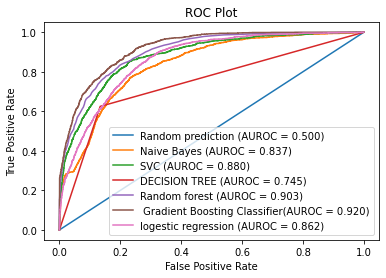

In [81]:
plt.plot(r_fpr, r_tpr, label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(nb_fpr, nb_tpr,  label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(clf_fpr, clf_tpr, label='DECISION TREE (AUROC = %0.3f)' % clf_auc)
plt.plot(rnd_fpr, rnd_tpr, label='Random forest (AUROC = %0.3f)' % rnd_auc)
plt.plot(grd_fpr, grd_tpr, label=' Gradient Boosting Classifier(AUROC = %0.3f)' % grd_auc)
plt.plot(lr_fpr, lr_tpr,  label='logestic regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

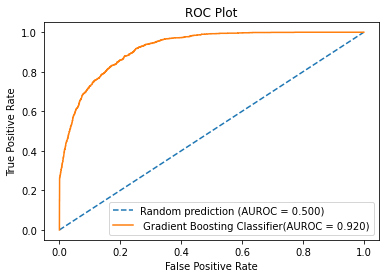

In [82]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(grd_fpr, grd_tpr, label=' Gradient Boosting Classifier(AUROC = %0.3f)' % grd_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()

# Report
As many classification algorithm has been applied and there accuaracy has been recorded and an analysis of confusion matrix the precision and recall score is less for the classification of income  >50k This is due to unbalanced data set.The project involved data assessment and cleaning, performing EDA and drawing conclusions from the data. Trained a Gradient Boosting Classifier model to predict income with 86.66% qualityand has the maximum Area Under Curve with a value of 0.92.